In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


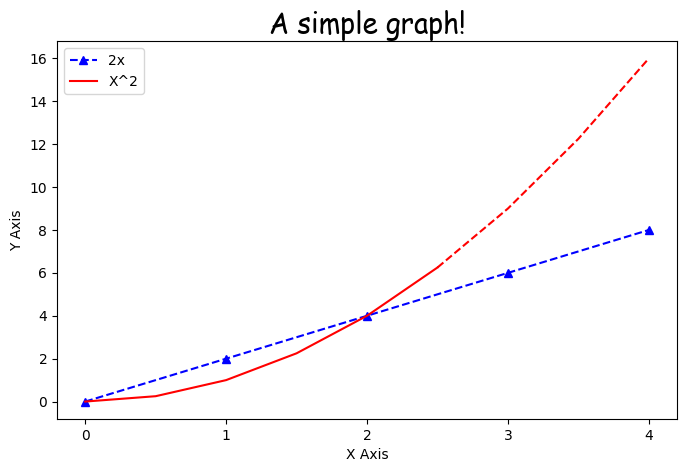

In [8]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Resize your Graph (here vizualisation on screen)
# Must be called before any other plotting functions, 
# to ensure that the plot is drawn on the correct figure.
plt.figure(figsize=(8,5), dpi=100)

## Line 1
# Keyword Argument Notation
#plt.plot(x,y, label='2x', color='red', linewidth=2, marker='.', linestyle='--', markersize=10, markeredgecolor='blue')

# Shorthand notation
# Reminder x = [0,1,2,3,4] y = [0,2,4,6,8]
# Here, b represents blue color, 
# ^ represents an upward-pointing triangle marker, 
# -- represents a dashed line.
plt.plot(x,y, 'b^--', label='2x')

## Line 2
# select interval we want to plot points
# values ranging from 0 to 4.5 (inclusive) with a step size of 0.5.
x2 = np.arange(0,4.5,0.5)

# Plot part of the graph as line (first 6 values [0-2.5])
# the square of the first six elements 
# r for red + label
plt.plot(x2[:6], x2[:6]**2, 'r', label='X^2')

# Plot remainder of graph as a dot
# calculates the square of the elements starting from the sixth element.
# 'r--' specifies the color of the line as red and the line style as dashed.
plt.plot(x2[5:], x2[5:]**2, 'r--')

# Add a title (specify font parameters with fontdict)
plt.title('A simple graph!', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# X, Y axis Tickmarks (scale of your graph)
plt.xticks([0,1,2,3,4,])
#plt.yticks([0,2,4,6,8,10])

# Add a legend 
# without any arguments > generate a legend for each labeled line
plt.legend()

# Save figure (dpi 300 is good when saving so graph has high resolution)
plt.savefig('mygraph.png', dpi=300)

# Show plot
plt.show()

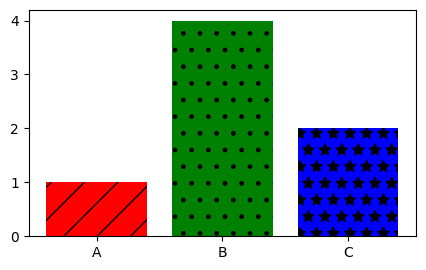

In [15]:
## BAR CHART
# categories of data being displayed along the x-axis
labels = ['A', 'B', 'C']
# numerical values being displayed along the y-axis
values = [1,4,2]

# sets the size of the figure 
plt.figure(figsize=(5,3), dpi=100)

# creates the bars in the chart and assigns them to the bars variable.
bars = plt.bar(labels, values, color= ['r', 'g', 'b'])

# creates a list of hatch patterns that will be used to fill the bars.
# other patterns: '\\' '+''x' 'O' 
patterns = ['/', '.', '*']

# assigns a hatch pattern to each bar
for bar in bars:
    bar.set_hatch(patterns.pop(0))

plt.savefig('barchart.png', dpi=300)

plt.show()

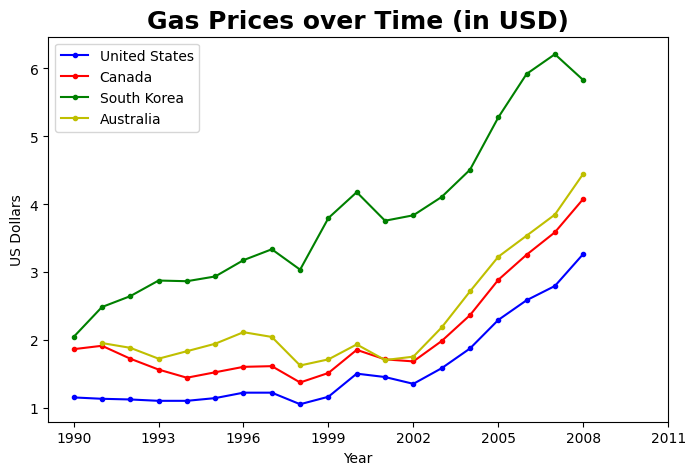

In [104]:
## LINE GRAPH

gas = pd.read_csv('gas_prices.csv')

plt.figure(figsize=(8,5))

plt.title('Gas Prices over Time (in USD)', fontdict={'fontweight':'bold', 'fontsize': 18})

plt.plot(gas.Year, gas.USA, 'b.-', label='United States')
plt.plot(gas.Year, gas.Canada, 'r.-', label='Canada')
plt.plot(gas.Year, gas['South Korea'], 'g.-', label='South Korea')
plt.plot(gas.Year, gas.Australia, 'y.-', label='Australia')

# Another Way to plot many values!
# countries_to_look_at = ['Australia', 'USA', 'Canada', 'South Korea']
# for country in gas:
#     if country in countries_to_look_at:
#         plt.plot(gas.Year, gas[country], marker='.')

plt.xticks(gas.Year[::3].tolist()+[2011])

plt.xlabel('Year')
plt.ylabel('US Dollars')

plt.legend()

plt.savefig('Gas_price_figure.png', dpi=300)

plt.show()


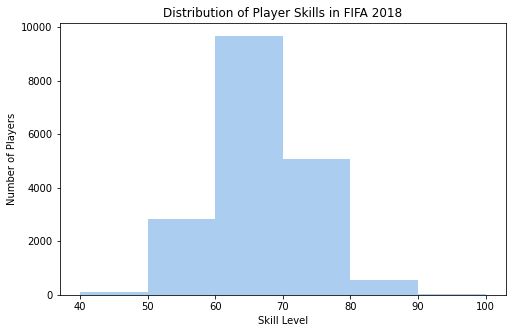

In [22]:
## HISTOGRAM

# Load FIFA Data
fifa = pd.read_csv('fifa_data.csv')

#fifa.head()

# Define the ranges for each bin of the histogram.
bins = [40,50,60,70,80,90,100]

plt.figure(figsize=(8,5))

# Create the histogram of player skill levels
plt.hist(fifa.Overall, bins=bins, color='#abcdef')

# Set the tick locations on the x-axis to match the bin edges
# could work without it but not sure if they would match
plt.xticks(bins)

plt.ylabel('Number of Players')
plt.xlabel('Skill Level')
plt.title('Distribution of Player Skills in FIFA 2018')

plt.savefig('histogram.png', dpi=300)

plt.show()

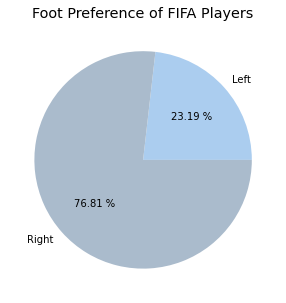

In [32]:
## PIE CHART n°1

left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

plt.figure(figsize=(8,5))

labels = ['Left', 'Right']
colors = ['#abcdef', '#aabbcc']

# format the percentage to two decimal places and appends a percentage sign at the end.
plt.pie([left, right], labels = labels, colors=colors, autopct='%.2f %%')

plt.title('Foot Preference of FIFA Players')

plt.show()

In [72]:
fifa[['Weight']]

,Weight
0,159.0
1,183.0
2,150.0
3,168.0
4,154.0
...,...
18202,134.0
18203,170.0
18204,148.0
18205,154.0


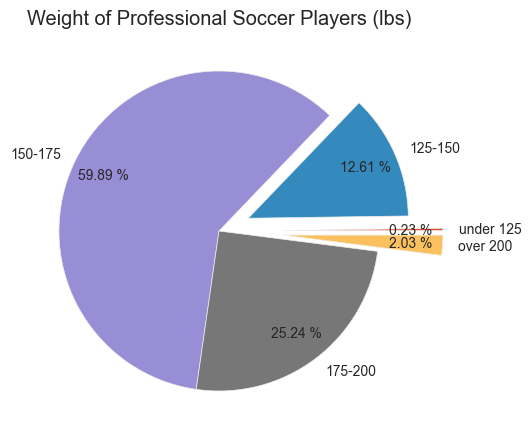

In [57]:
## PIE CHART n°2
plt.figure(figsize=(8,5), dpi=100)

#set the plot style (light grey background)
# other :"classic", "bmh", "seaborn",
plt.style.use('ggplot')

# List comprehension that converts the "Weight" column of the fifa dataframe from strings to integers.
fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]

# number of rows in the fifa DataFrame where the Weight column is less than 125.
light = fifa.loc[fifa.Weight < 125].count()[0]
# same for the other weight classes
light_medium = fifa[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa[fifa.Weight >= 200].count()[0]

# lists for the graphic
weights = [light,light_medium, medium, medium_heavy, heavy]
label = ['under 125', '125-150', '150-175', '175-200', 'over 200']
# Specify the fraction of the radius by which to offset each wedge in the pie chart.
explode = (.4,.2,0,0,.4)

plt.title('Weight of Professional Soccer Players (lbs)')

plt.pie(weights, labels=label, explode=explode, pctdistance=0.8,autopct='%.2f %%')
plt.show()

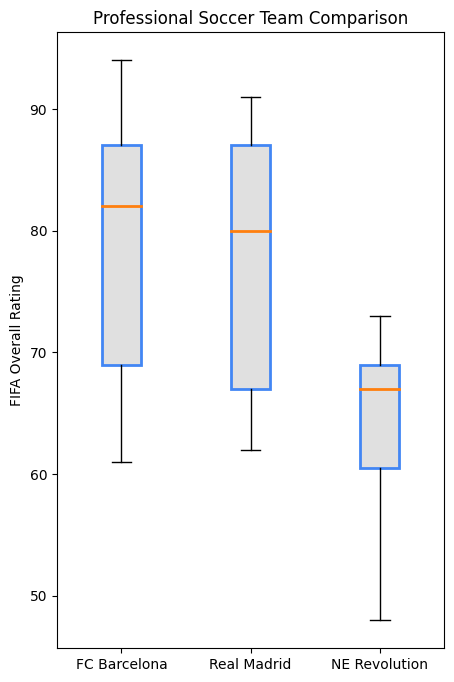

In [69]:
## Box and Whiskers Chart
# A box and whisker plot(box plot) displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum.

plt.figure(figsize=(5,8), dpi=100)

plt.style.use('default')

# new df with rows where the "Club" column is equal to e.g. "FC Barcelona", and select only the "Overall" column.
barcelona = fifa.loc[fifa.Club == "FC Barcelona"]['Overall']
madrid = fifa.loc[fifa.Club == "Real Madrid"]['Overall']
revs = fifa.loc[fifa.Club == "New England Revolution"]['Overall']

# create boxplots 
    # patch_artist parameter is set to True to enable filling the boxplots with color.
        # the boxes become artists that can be modified individually using the set method.
    # medianprops parameter is a dict. of properties to be used to style the median line of the boxplots.
bp = plt.boxplot([barcelona, madrid, revs], labels=['FC Barcelona','Real Madrid','NE Revolution'], patch_artist=True, medianprops={'linewidth': 2})

plt.title('Professional Soccer Team Comparison')
plt.ylabel('FIFA Overall Rating')

for box in bp['boxes']:
    # change outline color (blue)
    box.set(color='#4286f4', linewidth=2)
    # change fill color (light gray)
    box.set(facecolor = '#e0e0e0' )
    
plt.show()

In [82]:
# in order to find the name of the column correspond to their salary
print(fifa.columns)
# to  look at the data 
fifa[['Wage']]

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

,Wage
0,€565K
1,€405K
2,€290K
3,€260K
4,€355K
...,...
18202,€1K
18203,€1K
18204,€1K
18205,€1K


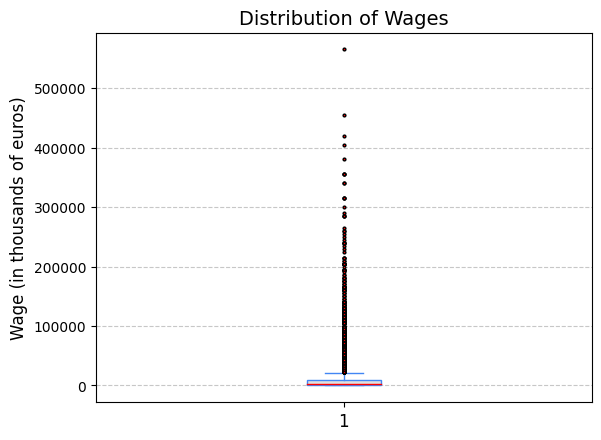

In [102]:
# convert to integer
    #If the value is a string, it first strips the '€' and 'K' characters 
        #from the string using the strip() function 
        #and then multiplies the remaining value by 1000 
        #to convert it into an integer representing the wage in Euros. 
    #If the last character of the string is 'K', it implies that the wage is in thousands 
        #and hence needs to be multiplied by 1000 to convert it to Euros.
    #else - If the value is not a string, it is simply returned as is without any modification.
    #The apply method with the lambda function is used to modify the values in the column, 
    # and then the modified values are assigned back to the same column in the dataframe using the = operator.
fifa.Wage = fifa['Wage'].apply(lambda x: int(x.strip('€').strip('K')) * 1000 if isinstance(x, str) and x[-1] == 'K' else int(x.strip('€')) if isinstance(x, str) else x)

# Create box plot
plt.boxplot(fifa['Wage'], patch_artist=True, boxprops=dict(facecolor='#e0e0e0', color='#4286f4'), medianprops=dict(color='red'), whiskerprops=dict(color='#4286f4'), capprops=dict(color='#4286f4'),flierprops=dict(marker='o', markerfacecolor='red', markersize=2))

# Set title and labels
plt.title('Distribution of Wages', fontsize=14)
plt.ylabel('Wage (in thousands of euros)', fontsize=12)
plt.xticks(fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


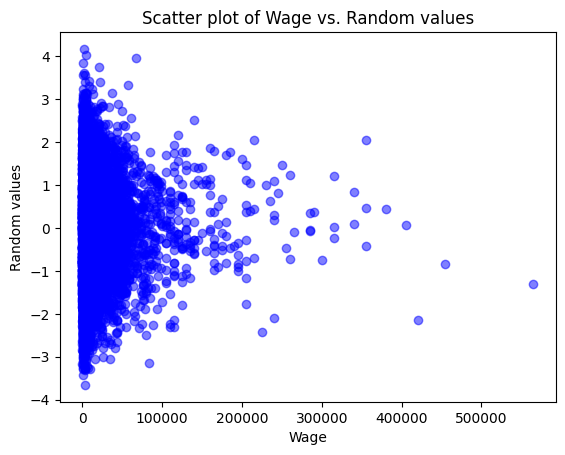

In [105]:

# Generate some sample data
x = fifa['Wage']
y = np.random.randn(len(x))

# Create a scatter plot
plt.scatter(x, y, color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Wage')
plt.ylabel('Random values')
plt.title('Scatter plot of Wage vs. Random values')

# Show the plot
plt.show()

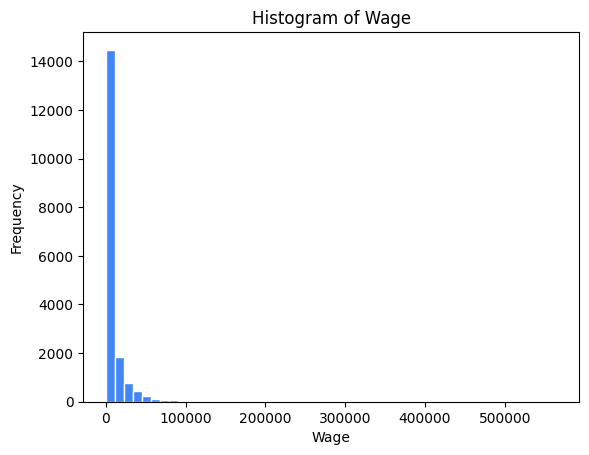

In [115]:
# Create a histogram
plt.hist(fifa['Wage'], bins=50, color='#4286f4', edgecolor='white')

# Add labels and title
plt.xlabel('Wage')
plt.ylabel('Frequency')
plt.title('Histogram of Wage')

# Show the plot
plt.show()